# Imports

In [1]:
import numpy as np
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img, array_to_img
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from keras.applications.vgg16 import decode_predictions as decode_vgg
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam

# The Pre-trained model: VGG16
- Created by researchers at oxford university UK.
- VGG16 is a 16 layer convolutional neural network trained on more than a million images from the ImageNet database.
- Can classify images into over 1000 object categories, such as keyboard, mouse, pencil, and many animals.
- The VGG network requires an image input of size 224-by-224, in the form of 4D tensor of shape (samples, height, width, channels).


- For other models, see [keras pre-trained applications](https://keras.io/api/applications/)



# Mounting Google Drive
- This code will mount my google drive on Colab.
- We upload the data on our drive then we mount it in Colab to avoid loading process again and again.
- It is helpful if Google Colab is used, not required if the code is run on Anaconda.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# The Dataset

- The dataset contains images of cats and dogs.
- Source: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

- The original dataset contains a total of 25000 images with 12500 images of cats and dogs each. Size of data set is 786.7 MB.

- Here we are using only 600 images, 300 from each class.
- These 600 images have been placed in a folder called 'catsndogs', which further contains two folders, one called 'Class_a' containing images of cats, and the second one called 'Class_b' containing images of dogs.

### Creating 4D tensor of all images and setting labels for test data

In [2]:
#This method  two arrays:
#the first one contains the list of all filenames, and
#the second one contains the list of all corresponding labels
def load_dataset(path):
    data = load_files(path)
    paths = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']))
    return paths, targets

files, targets = load_dataset('catsndogs')

#This method loads an image, converts it to binary, and then adds a dimension to it.
def path_to_tensor(img_path):
    img = load_img(img_path, target_size=(224, 224)) #Loading an RGB image as PIL.Image.Image type
    x = img_to_array(img) #Converting the PIL.Image.Image type to a 3D tensor with shape (224, 224, 3)
    return np.expand_dims(x, axis=0) #Converting the 3D tensor to a 4D tensor with shape (1, 224, 224, 3) and returns the 4D tensor

#This method returns a 4D tensor of all images in binary form
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

image_tensors = paths_to_tensor(files)

In [4]:
#Tensor of images
image_tensors
image_tensors.shape

(600, 224, 224, 3)

In [5]:
#The varaible 'target' contains two separate values for each pinture.
#First value shows if it is a cat (Class_a), and the second value shows if it is a dog (Class_b).
targets

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [6]:
#Converting 'targets into one-valued array 'target'
single_target=[]

for i in targets: #Label 0 is cat and 1 is dog
    if i[0]==0.:
        single_target.append(1) #for cat
    else:
        single_target.append(0) #for dog
#target=np.array(single_target).reshape(-1,1)
target=np.array(single_target)
target
#target.shape

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

### Checking out some random images for verification

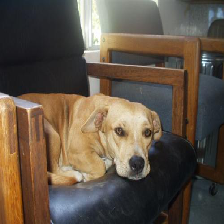

A dog


In [8]:
img_no=30
display(array_to_img(image_tensors[img_no]))

if target[img_no]==0:
    print('A cat')
else:
    print('A dog')

### Preprocessing the images as per requirement of the VGG model

In [9]:
images = preprocess_input_vgg(image_tensors)

- Now 'images' contains the preprocessed 4D tensor of images and 'target' contains the corrresponding labels.

### Spliting into train, valid and test sets

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(images, target,test_size=0.1,random_state=0)
X_train,X_valid,Y_train,Y_valid = train_test_split(X_train, Y_train,test_size=0.2,random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_valid:', X_valid.shape)
print('Shape of Y_valid:', Y_valid.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (432, 224, 224, 3)
Shape of Y_train: (432,)
Shape of X_valid: (108, 224, 224, 3)
Shape of Y_valid: (108,)
Shape of X_test: (60, 224, 224, 3)
Shape of Y_test: (60,)


# Case 1: Using a pre-trained network as classifier

### Downloading the model and its pre-trained weights

In [11]:
%%time
vgg_case1 = VGG16(weights = "imagenet", input_shape = (224,224, 3)) 

Wall time: 4.04 s


In [12]:
vgg_case1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Making Prediction on an image

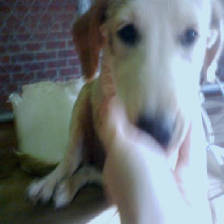

1/1 [==============================] - 0s 360ms/step


[[('n02091831', 'Saluki', 0.5131937),
  ('n02099712', 'Labrador_retriever', 0.1991513),
  ('n02099601', 'golden_retriever', 0.07202403),
  ('n02090622', 'borzoi', 0.046034098),
  ('n02089867', 'Walker_hound', 0.039428633)]]

In [14]:
img_no=0

display(array_to_img(image_tensors[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)
#Predicting the probability across all output classes
prediction_vgg_case1 = vgg_case1.predict(selected_img) 
prediction_vgg_case1

#Converting the probabilities to class labels
labels=decode_vgg(prediction_vgg_case1)
labels

#Retrieving the most likely result with the highest probability
#labels[0][0] 

### Evaluating the model
- We cannot evaluate the model here as VGG classifer supports 1000 classes, while our Y_test has only 2.

# Case 2: Using a pre-trained network as feature extractor

### Downloading the model without the classifier

In [15]:
%%time
vgg_case2 = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3)) 
#include_top is false to ignore the fully connected classifier part on top of the model.

Wall time: 733 ms


In [16]:
vgg_case2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Freezing the feature extraction layers

In [17]:
for layer in vgg_case2.layers: 
    layer.trainable = False

In [18]:
vgg_case2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Adding our custom classfiier

In [19]:
last_layer_case2 = vgg_case2.get_layer('block5_pool') #Saving the last layer of the network

last_output_case2 = last_layer_case2.output #Saving the output of the last layer to be the input of the next layer

x1 = Flatten()(last_output_case2) #Flattenning the classifier input, which is the output of the last layer of the VGG16 model
x1 = Dense(64, activation='relu', name='FC_2')(x1) #Adding 1 dense layer of 64 neurons
x1 = BatchNormalization()(x1) 
x1 = Dropout(0.5)(x1) 
x1 = Dense(1, activation='sigmoid', name='sigmoid')(x1) #Adding our new softmax layer with two hidden units
#x1 = Dense(2, activation='softmax', name='softmax')(x1) #Adding our new softmax layer with two hidden units

model_vgg_case2 = Model(inputs=vgg_case2.input, outputs=x1) #Instantiating a new_model

model_vgg_case2.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Compiling the model

In [20]:
model_vgg_case2.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Training the model

In [ ]:
%%time
model_vgg_case2.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=0, validation_data=(X_valid, Y_valid))

### Making Prediction on the image

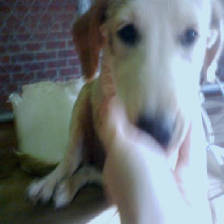

1/1 [==============================] - 1s 591ms/step
99.99 % probability that the image contains a dog


In [21]:
img_no=0
display(array_to_img(image_tensors[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)

prediction_vgg_case2 = model_vgg_case2.predict(selected_img) 
print(round(prediction_vgg_case2[0][0]*100,2),'% probability that the image contains a dog')

### Evaluating the model

In [22]:
print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model_vgg_case2.evaluate(X_test, Y_test)))

2/2 [==============================] - 15s 7s/step - loss: 6.5675 - accuracy: 0.5833

Testing loss: 6.5675
Testing accuracy: 0.5833


# Case 3: Using a pre-trained with fine tuning

### Downloading the model without the classifier

In [23]:
%%time
vgg_case3 = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3)) 
#include_top is false to ignore the fully connected classifier part on top of the model.

Wall time: 799 ms


In [24]:
vgg_case3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Freezing the feature extraction layers, leaving last 5 layers

In [25]:
for layer in vgg_case3.layers[:-5]: 
    layer.trainable = False

In [26]:
vgg_case3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Adding our custom classfiier

In [ ]:
last_layer_case3 = vgg_case3.get_layer('block5_pool') #Saving the last layer of the network

last_output_case3 = last_layer_case3.output #Saving the output of the last layer to be the input of the next layer

x2 = Flatten()(last_output_case3) #Flattenning the classifier input, which is the output of the last layer of the VGG16 model
x2 = Dense(64, activation='relu', name='FC_2')(x2) #Adding 1 dense layer of 64 neurons
x2 = BatchNormalization()(x2) 
x2 = Dropout(0.5)(x2) 
x2 = Dense(1, activation='sigmoid', name='sigmoid')(x2) #Adding our new softmax layer with two hidden units
#x2 = Dense(2, activation='softmax', name='softmax')(x2) #Adding our new softmax layer with two hidden units

model_vgg_case3 = Model(inputs=vgg_case3.input, outputs=x2) #Instantiating a new_model

model_vgg_case3.summary() 

### Compiling the model

In [ ]:
model_vgg_case3.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Training the model

In [ ]:
%%time
model_vgg_case3.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=0, validation_data=(X_valid, Y_valid))

### Making Prediction on the image

In [ ]:
img_no=0
display(array_to_img(image_tensors[img_no]))

selected_img=np.expand_dims(images[img_no], axis=0)
#Predicting the probability across all output classes
prediction_vgg_case3 = model_vgg_case3.predict(selected_img) 
prediction_vgg_case3

#Converting the probabilities to class labels
labels=decode_vgg(prediction_vgg_case3)
labels

#Retrieving the most likely result with the highest probability
#labels[0][0] 

### Evaluating the model

In [27]:
print('\nTesting loss: {:.4f}\nTesting accuracy: {:.4f}'.format(*model_vgg_case3.evaluate(X_test, Y_test)))

NameError: name 'model_vgg_case3' is not defined